# LDA Analysis, Case Study 4: Waves

We will be exploring an LDA analysis of the "Wave Speed I / Pulse Flick v3" question, which asks : 

> *Consider the following two scenarios: In scenario 1, your Teaching Assistant (TA) creates a pulse by flicking the end of a spring, as in the figure at right. In scenario 2, your TA pulls the spring so that it is more taut (i.e., increases the tension in the spring) and then creates a pulse by flicking the end of the spring in the same way. The pulse in scenario 2 travels down the spring **faster** (i.e., has a larger speed) than the pulse in scenario 1.*
> 
> *Why would it make sense for a pulse to move faster on a higher-tension spring? (We're trying to understand your intuition, not not whether or not you can remember particular equations. In other words, we want to know how you make sense of this phenomenon.)*


## I. Imports

In [1]:
# Print out all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Wider Cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# Ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import pickle as pkl
import copy

# NLP Packages
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

import sys  
sys.path.insert(0, '..')
from scripts.lda_model import *

## II. Data Import and Restructuring

In [2]:
df = pd.read_csv('../data/waves.csv', names = ['ID', 'resp'])
df.drop(columns = ['ID'], inplace = True)
df.head(5)

,resp
0,"Due to the high pulling force, there will be a..."
1,The string can be thought of as a system of a ...
2,The velocity of a wave(pulse) on a string is e...
3,"Velocity and Tension are proportional, so as t..."
4,Higher tension results in a lower mass per uni...


## III. LDA Modeling

The following code will take the data processed above and convert it into a usable format for the LDA model. Before we start modeling, though, we need to set some parameters for our particular data. 

In [3]:
bigrams =               text_to_bigrams(df)
corpus =                bigrams_to_corpus(bigrams)

Let's take a look at some plots of the words used in the collection of student responses. 

Total words: 5024, unique words: 644


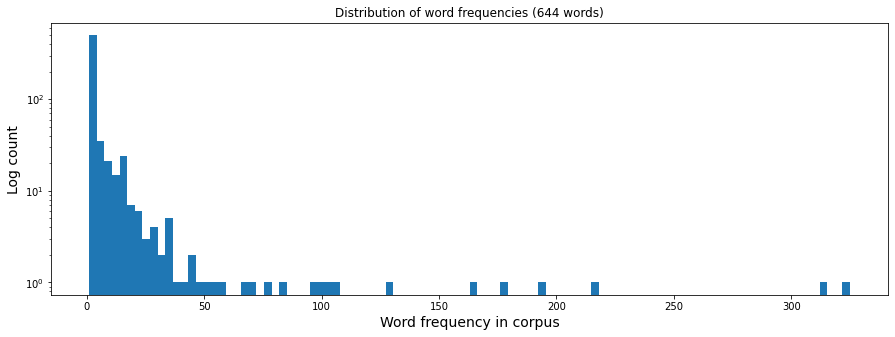

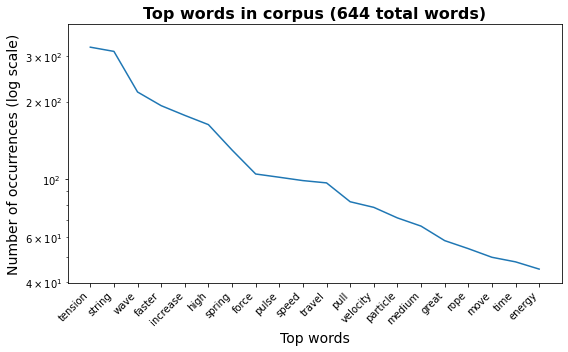

In [4]:
plot_words(corpus)

Let's now figure out the best thresholds for removing the most and least common words. A `no_above` threshold of 70% would remove words used in at least 70% of documents, and a `no_below` threshold of 3 would remove words used in only two or fewer documents. 

In [5]:
display_words_removed_at_thresholds(bigrams)


NO ABOVE THRESHOLDS


Dictionary with no_above=1 contains 644 unique words

Dictionary filtered with no_above=1.00 contains 644 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.90 contains 644 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.80 contains 644 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.70 contains 643 unique words. 1 words removed:
 ['tension'] 

Dictionary filtered with no_above=0.60 contains 643 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.50 contains 641 unique words. 2 words removed:
 ['faster', 'string'] 

Dictionary filtered with no_above=0.40 contains 640 unique words. 1 words removed:
 ['wave'] 

Dictionary filtered with no_above=0.30 contains 638 unique words. 2 words removed:
 ['high', 'increase'] 

Dictionary filtered with no_above=0.20 contains 632 unique words. 6 words removed:
 ['force', 'pulse', 'speed', 'spring', 'travel', 'velocity'] 

Dictionary fil

You can now set the desired threshold values based on this particular data set. 

In [6]:
no_above = 0.2
no_below = 3

In [7]:
bow, id2word= create_bow(corpus, bigrams, no_above, no_below, 
                         display_removed_words = False)

We can now proceed with the actual modeling process. Here, you can set a number of topics desired for the model, as well as the number of responses to display for each topic. By default, the number of responses displayed is three, but that can be overridden by setting a value. 

In [22]:
num_topics = 8
num_responses_displayed = 4

In [23]:
model = LDA_model(bow, id2word, bigrams, 
                  num_topics = num_topics)
model.show_topics(num_words = 10, 
                  num_topics = num_topics)

Coherence of model with 8 topics: 0.3966163186067419




[(0,
  '0.127*"frequency" + 0.123*"change" + 0.066*"wavelength" + 0.062*"property" + 0.044*"material" + 0.034*"pitch" + 0.033*"end" + 0.027*"guitar" + 0.027*"depends" + 0.025*"large"'),
 (1,
  '0.060*"length" + 0.053*"equation" + 0.051*"sqrt" + 0.047*"mass" + 0.043*"density" + 0.038*"root" + 0.038*"mu" + 0.032*"decrease" + 0.029*"unit" + 0.027*"square"'),
 (2,
  '0.056*"move" + 0.053*"pull" + 0.041*"cause" + 0.033*"amplitude" + 0.031*"tighter" + 0.029*"flick" + 0.027*"small" + 0.027*"medium" + 0.027*"scenario" + 0.023*"molecule"'),
 (3,
  '0.099*"energy" + 0.081*"large" + 0.080*"amplitude" + 0.033*"pull" + 0.032*"taut" + 0.030*"molecule" + 0.026*"transfer" + 0.026*"sense" + 0.022*"medium" + 0.020*"scenario"'),
 (4,
  '0.091*"rope" + 0.047*"point" + 0.045*"slack" + 0.044*"time" + 0.038*"distance" + 0.029*"low" + 0.027*"pull" + 0.025*"take" + 0.024*"tight" + 0.023*"scenario"'),
 (5,
  '0.211*"particle" + 0.094*"pull" + 0.062*"time" + 0.051*"shorter" + 0.047*"mean" + 0.037*"motion" + 0.03

In [24]:
display_n_responses(df, num_responses_displayed, model, corpus, bow)

Topic 0: 0.127*"frequency" + 0.123*"change" + 0.066*"wavelength" + 0.062*"property" + 0.044*"material" + 0.034*"pitch" + 0.033*"end" + 0.027*"guitar" + 0.027*"depends" + 0.025*"large"


,resp,0,1,2,3,4,5,6,7
77,"With my intuition, I know strings with higher tension have a higher pitch because I play the guitar. Pitch is determined by frequency (Hz). The length of string is not changed (wavelength), so to change the frequency, the speed must be changed since wave speed is frequency times wavelength.",0.978310,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,"Changing the tension of the string changes the properties of the string in a way. It is as though the string is composed of a stiffer material, and waves travel faster in stiffer materials. This is because energy can travel faster through more compressed materials.",0.957662,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,"Since the length of the string is essentially increased when tension is applied at one end, the wavelength would also increase. In other words, this would mean that the pulse travels down the spring quicker.",0.957661,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,"The tension in the string will act as a restoring force against any disturbances in it and propel the wave forward. Therefore the more tension, the more force there will be to ""push"" the wave along, similar to how a tight rubber band will bounce back faster than a loose one.",0.951942,0.0,0.0,0.0,0.0,0.0,0.0,0.0





Topic 1: 0.060*"length" + 0.053*"equation" + 0.051*"sqrt" + 0.047*"mass" + 0.043*"density" + 0.038*"root" + 0.038*"mu" + 0.032*"decrease" + 0.029*"unit" + 0.027*"square"


,resp,0,1,2,3,4,5,6,7
136,"If you increase the tension ultimately you tend to increase the length of the wire by a small amount. Now the no. of molecules inside the wire remains constant, When the wire length was not increased the molecule was spread in that particular length but as we increase the length the amount of molecules in the same unit length tend to decrease so the density tend to decrease ultimately. Now from the equation the tension tends to increase and mu tend to decrease, so the velocity overall tend to increase.",0.0,0.985767,0.0,0.0,0.0,0.0,0.0,0.0
189,"This is because the speed equals the square root of tension/mu. When you increase the tension you increase the speed. This makes sense conceptually because when the tension increases the rope gains a little bit of length, enough to spread the molecules in the rope across a greater area decreasing the overall density in any given spot in the rope.",0.0,0.981127,0.0,0.0,0.0,0.0,0.0,0.0
2,"The velocity of a wave(pulse) on a string is equal to the square root of Tension over the mass-density of the string. so V(wave)=sqrt(T/u)/ Therefore, if you increase the Tension, which is in the numerator, then it follows that you increase the calculated number underneath the root and as numbers increase, so do there square roots, so it follows the the velocity of the wave dur to the higher tension must be higher.",0.0,0.975886,0.0,0.0,0.0,0.0,0.0,0.0
181,"The pulse moves faster in the higher tension string because there is a smaller mass per unit length in the spring. When the spring is pulled and further stretched out, it not only has a higher tension but also a smaller mass per unit length. This means any given pulse will travel down the spring faster than if the spring were not pulled to a higher tension.",0.0,0.975886,0.0,0.0,0.0,0.0,0.0,0.0





Topic 2: 0.056*"move" + 0.053*"pull" + 0.041*"cause" + 0.033*"amplitude" + 0.031*"tighter" + 0.029*"flick" + 0.027*"small" + 0.027*"medium" + 0.027*"scenario" + 0.023*"molecule"


,resp,0,1,2,3,4,5,6,7
179,"The reason why the pulse moves faster when the tension of the spring is increased is because the speed of the wave is dependent on the property of the medium. The reason why the speed of the wave is dependent on the property of the medium is because, in this case, when we pull on the spring we bring the atoms within the spring closer to each other. This means that when a wave is sent through a taut spring, and since the atoms are much closer to each other, they experience less time to move, increasing the speed of the atoms moving in a wave (increasing the velocity of the wave).",0.0,0.0,0.984296,0.0,0.0,0.0,0.0,0.0
6,"When there is more slack in the string, the weight force MG drags the string downward, causing you to flick the string harder to make a bigger wave and a stronger flick to propagate it. When the string is tighter, there is a stronger tension force and MG isn't dragging the string down as hard. The string is being stretched so the flick causes a faster wave speed, but a smaller wavelength because the net force is in the direction of the hand, not downward due to gravity.",0.0,0.0,0.984296,0.0,0.0,0.0,0.0,0.0
209,"I think the wave moves faster because it takes more force to make the amplitude high in a tense rope, meaning that the tense rope pulls forces in the horizontal direction, making the wave move faster on that direction, rather than making the amplitude higher.",0.0,0.0,0.978552,0.0,0.0,0.0,0.0,0.0
158,"The pulse would move faster because it was pulled tighter. When I was younger, I would pull a rubber band tight, and pretend like it was a musical instrument. The tighter you pulled it, the higher note it would make, which was because the frequency increased. If it is pulled tighter, the string can resist the movement less, so it moves faster.",0.0,0.0,0.973752,0.0,0.0,0.0,0.0,0.0





Topic 3: 0.099*"energy" + 0.081*"large" + 0.080*"amplitude" + 0.033*"pull" + 0.032*"taut" + 0.030*"molecule" + 0.026*"transfer" + 0.026*"sense" + 0.022*"medium" + 0.020*"scenario"


,resp,0,1,2,3,4,5,6,7
30,"It takes less energy to move each ""part"" of the string laterally if it is already almost at an equilibrium, (being straight) or at least closer to it, which is exactly what increasing the tension on it does. A wave travels in this medium by ""replicating the motion of the initial disturbance"" down the length of the string, and to do so, they must move each part of the string in a direction perpendicular to the transversal of the wave. If the string is not taught, and thus ""droops"" due to gravity, there is more distance which must be accounted for, and a resistance due to conflicting angles (the string not being straight). More energy is consumed accounting for the unevenness of the string, and thus the wave cannot transverse the length of the string as fast.",0.0,0.0,0.0,0.982111,0.0,0.0,0.0,0.0
11,"It would make sense for a spring to travel faster when there is a larger tension force because energy is transferred quicker through a tighter medium . A larger tension provides a medium that allows energy to pass through it faster. I believe that on a spring with a larger tension, more energy is transferred horizontally rather than vertically as amplitude.",0.0,0.0,0.0,0.979028,0.0,0.0,0.0,0.0
134,"The way I imagine this is by using a guitar string as an example. As you tune a guitar string, if you have the string very lose and you strum, you can watch the wave shoot up from your finger and to the nut at the top. As you tighten the string/ adding tension, it becomes harder and harder to follow the wave up the string because it begins to move faster and faster.",0.0,0.0,0.0,0.964916,0.0,0.0,0.0,0.0
172,"Less tension in the string would mean less force on each infinitesimal piece of string. Since scenario 2 has more tension, there would be more force on the string. Thus, each infinitesimal piece of string is being pulled on harder during the wave which in turn allows the wave to move faster.",0.0,0.0,0.0,0.956566,0.0,0.0,0.0,0.0





Topic 4: 0.091*"rope" + 0.047*"point" + 0.045*"slack" + 0.044*"time" + 0.038*"distance" + 0.029*"low" + 0.027*"pull" + 0.025*"take" + 0.024*"tight" + 0.023*"scenario"


,resp,0,1,2,3,4,5,6,7
70,"When you pull the string tight, the mass gets more evenly spread out all throughout the string. This makes the pulse go faster because you don't have to move the mass of the string at any point higher or lower than when the string was loose. When the string is loose, the mass of the string will hang low at one point and in order to make a pulse, you have to flick the string a lot harder to make the string go up from its low point. When the string is tight, it creates a straight line so you don't have to worry about any point where it will hang lower and so when you flick it, the pulse will oscillate up and down between the middle line. When the string is loose, there will be a low point and you have to put in extra force to make it so the low point also reaches a high point which creates a pulse.",0.0,0.0,0.0,0.0,0.990918,0.0,0.0,0.0
17,"The speed of the wave is the time taken for a point or multiple points in the string to return to it's original position. The faster the string returns to the initial position, the higher the speed of the wave is. This can be expressed in the equation v=(T*l/m)^0.5. T is the tension of the string, l is the length and m is the mass. As the tension increases, there is a larger magnitude of force ""pulling"" the string to return to it's original position, thus reducing the time taken to do so. The time is found through the equation distance=speed*time. As the speed increases, the time decreases since distance is supposed to remain the same.",0.0,0.0,0.0,0.0,0.987721,0.0,0.0,0.0
230,"Without using any equations just intuition, i would say: the more tension means each small unit of the spring can communicate the movement to the next small unit of spring quicker. Kind of like if I had a line of bowling balls and I rolled one into the beginning one, the distance between each subsequent ball will need to be traversed for each initial ball to 'communicate' its movement to the next. So the smaller that distance the faster the message gets across and with a tight spring those 'bowling balls' are close together. And this extra distance in the spring is the 'slack' thats created from lack of tension.",0.0,0.0,0.0,0.0,0.985098,0.0,0.0,0.0
253,"When you pull something tighter you are taking the slack out of it. So by removing slack you make it easier to manipulate the actual string. When you pulse the string while it has slack it has more to it, more of it has to travel over the distance. When you remove this slack it takes the extra string out allowing it to move faster over the same distance.",0.0,0.0,0.0,0.0,0.973980,0.0,0.0,0.0





Topic 5: 0.211*"particle" + 0.094*"pull" + 0.062*"time" + 0.051*"shorter" + 0.047*"mean" + 0.037*"motion" + 0.032*"energy" + 0.027*"period" + 0.025*"position" + 0.022*"great"


,resp,0,1,2,3,4,5,6,7
55,"When we pull the string in the outward direction we are pulling the particles away from each other and this will increase the ability of a particle to pull its neighbor particle. As we all know that due to high pulling force we will have high tension force in the string/body. So, due to high attraction or restraining force particle will complete its motion about its mean position in shorter time. Thus increasing the rate of flow of energy and that is also known as the velocity of the wave. Greater the forces between particle, shorter will the time period of the particles hence wave will move faster under high tension.",0.0,0.0,0.0,0.0,0.0,0.988945,0.0,0.0
39,"When we pull the string in the outward bearing we are pulling the particles far from each other and this will build the capacity of a particle to draw its neighbor particle. As we as a whole we realize that because of the high pulling force we will have high tension force in the string/body. Along these lines, because of high fascination or limiting power particle will finish its movement about its mean position in shorter time. Expanding the rate of flow of energy and that is otherwise called the velocity of the wave. More noteworthy the strengths between molecule, shorter will the day and age of the particles henceforth wave will move speedier under high strain.",0.0,0.0,0.0,0.0,0.0,0.985321,0.0,0.0
40,"This is because with a more taut string, the restraining force is much higher than a loose string. Since the particles in the string are more taut, the force particle will complete its motion about it mean position in a shorter period of time. So, with greater forces between the particles, the shorter the time for the particle to complete its motion, which means the higher tension string will move faster.",0.0,0.0,0.0,0.0,0.0,0.983264,0.0,0.0
180,"When the string is pulled outward, you pull the particles away and increase the pull between particles. Due to high pull forces, the particle will move fully in a shorter time. The more energy flowing through the more forces between particles I.e. it moves faster under more tension.",0.0,0.0,0.0,0.0,0.0,0.976745,0.0,0.0





Topic 6: 0.073*"equilibrium" + 0.056*"restore_force" + 0.040*"cause" + 0.032*"medium" + 0.031*"position" + 0.030*"quicker" + 0.030*"return" + 0.029*"quickly" + 0.028*"move" + 0.028*"want"


,resp,0,1,2,3,4,5,6,7
232,"The speed at which a mechanical wave propagates through a medium has to do with how quickly the medium reverts back to its equilibrium position after being disturbed. The faster the medium snaps back, the faster the wave can move through it. Thus if the string is tighter, it is going to want to come back to its original position more than if it was loose, therefore tension will increase the pulse.",0.0,0.0,0.0,0.0,0.0,0.0,0.977922,0.0
193,The higher tension in the string results in a larger restoring forces which means that there is a larger acceleration for the string to return to its equilibrium position. The larger acceleration means the displacement will return to equilibrium faster.,0.0,0.0,0.0,0.0,0.0,0.0,0.977922,0.0
197,"With a higher a tension, the spring has a higher resistance to being disturbed or displaced. When a point on the spring moves out of place due to the wave, there is more force trying to bring it back to its original position. Because the spring isn't as displaced, the wave moves the spring at a higher speed.",0.0,0.0,0.0,0.0,0.0,0.0,0.974628,0.0
78,"If the tension of the string is higher, then the k value of the string will increase because the tension affects the restoring force of the string. If the tension is higher, the string will have a higher restoring force, causing the individual pieces of the rope to ""want"" to return to the equilibrium point faster than if the string was loose.",0.0,0.0,0.0,0.0,0.0,0.0,0.974628,0.0





Topic 7: 0.106*"medium" + 0.093*"great" + 0.033*"scenario" + 0.026*"act" + 0.025*"second" + 0.023*"like" + 0.022*"move" + 0.022*"result" + 0.021*"pull" + 0.019*"displace"


,resp,0,1,2,3,4,5,6,7
144,"If you think about a wave moving through the string on a molecular level, the molecules of the medium become displaced as it passes through. The more tension in the string, the more resistance the string has to snap back to the equilibrium faster. Just like tighter strings on a guitar vibrate faster than looser strings.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.975086
155,"The second time, each individual piece of the string is more tightly connected to its' neighbors. Therefore, When it is displaced, it will pull more on the pieces next to it rather than stretching them out. This means that it transfers it's displacement to the pieces next to it more rapidly.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.975086
138,"Based on my own knowledge and intuition, I would say that it makes sense for a pulse to move faster on a higher tension string because of ""the way the crow flies"". Everybody knows that if you are trying to get from destination A to destination B it's fastest if you can follow a B line there rather than going round about ways. If the spring is more taught, then a pulse will be able to travel through it faster, like a crow.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.975086
238,"A greater pulling force causes greater tension between the differential elements of the spring. This causes greater acceleration of these elements, and hence greater velocity. (By the way, did you mean string rather than spring? The diagram looks like a string.)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.968533


Potential Ideas from LDA: 